In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score

In [4]:
df = pd.read_csv("../../data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
df = df.drop(["phone number", "area code"], axis = 1)
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df['churn'] = df['churn'].astype(int) 
# df["international plan"] = df["international plan"].map({"yes":1,"no":0})
# df["voice mail plan"] = df["voice mail plan"].map({"yes":1,"no":0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [79]:
df["churn"].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

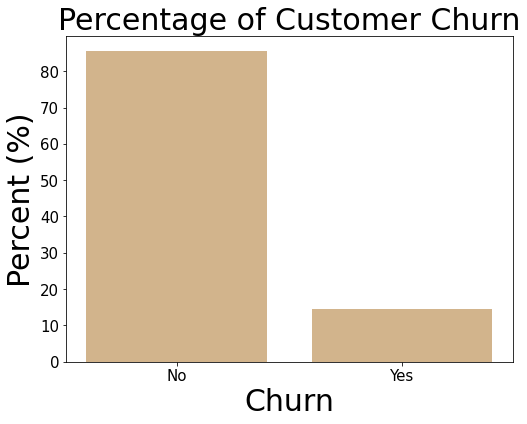

In [141]:
fig,ax = plt.subplots(figsize=(8,6))
plt.bar(x = df["churn"].unique(), height = round(df["churn"].value_counts(normalize=True)*100, 2), color= "tan")
plt.xticks(ticks=[0,1], labels=["No", "Yes"], fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("Churn", fontsize = 30)
ax.set_ylabel("Percent (%)", fontsize = 30)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_title("Percentage of Customer Churn",fontsize = 30)
plt.show()

In [10]:
def combine(name, *cols):
    "This function will name a new column and add as many columns as necessary"
    df[name] = sum(cols)

In [11]:
combine("total_domestic_minutes", 
        df["total day minutes"], 
        df["total eve minutes"], 
        df["total night minutes"])

In [12]:
combine("total_domestic_calls", 
        df["total day calls"], 
        df["total eve calls"], 
        df["total night calls"])

In [13]:
combine("total_domestic_charge", 
        df["total day charge"], 
        df["total eve charge"], 
        df["total night charge"])

In [14]:
combine("total_charge", 
        df["total_domestic_charge"], 
        df["total intl charge"])

In [15]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,11.01,10.0,3,2.70,1,0,707.2,300,72.86,75.56
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,11.45,13.7,3,3.70,1,0,611.5,329,55.54,59.24
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,7.32,12.2,5,3.29,0,0,527.2,328,59.00,62.29
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,8.86,6.6,7,1.78,2,0,558.2,248,65.02,66.80
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,8.41,10.1,3,2.73,3,0,501.9,356,49.36,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,12.56,9.9,6,2.67,2,0,650.8,286,57.43,60.10
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,8.61,9.6,4,2.59,3,0,575.8,235,60.94,63.53
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,8.64,14.1,6,3.81,2,0,661.5,258,63.93,67.74
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,6.26,5.0,10,1.35,2,0,512.6,326,56.18,57.53


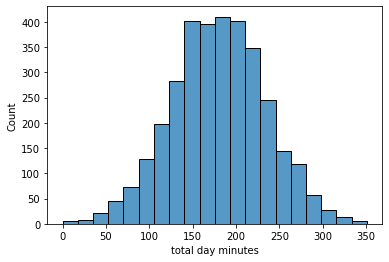

In [16]:
fig, ax = plt.subplots()
sns.histplot(df["total day minutes"], bins = 20)
plt.show()

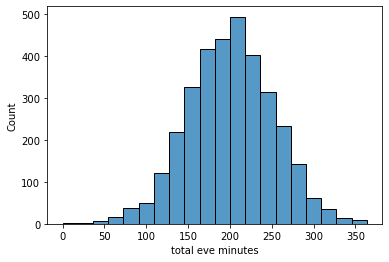

In [17]:
fig, ax = plt.subplots()
sns.histplot(df["total eve minutes"], bins = 20)
plt.show()

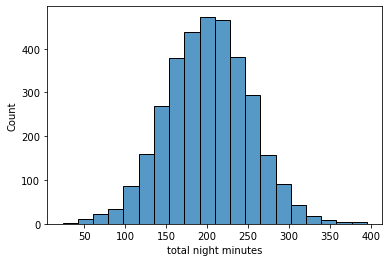

In [18]:
fig, ax = plt.subplots()
sns.histplot(df["total night minutes"], bins = 20)
plt.show()

In [143]:
df["total_charge"].mean()

59.44975397539747

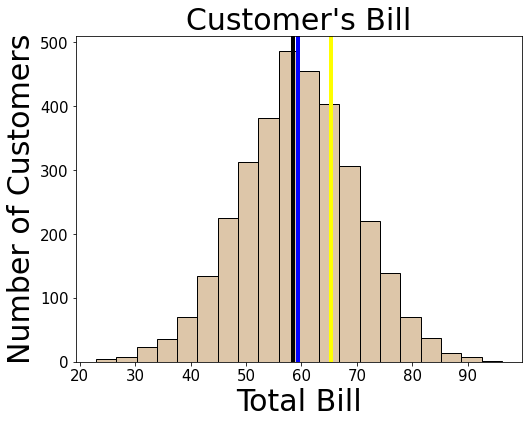

In [170]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(df["total_charge"], bins = 20, color= "tan")
# plt.show()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("Total Bill", fontsize = 30)
ax.set_ylabel("Number of Customers", fontsize = 30)
ax.set_title("Customer's Bill",fontsize = 30)
plt.axvline(df["total_charge"].mean(), linewidth=4, color='blue')
plt.axvline(churn["total_charge"].mean(), linewidth=4, color='yellow')
plt.axvline(not_churn["total_charge"].mean(), linewidth=4, color='black')
plt.show()

In [21]:
enhanced = df.groupby(by=['churn','customer service calls']).agg(['mean','count'])
enhanced

account length       number vmail messages        \
                                       mean count                  mean count   
churn customer service calls                                                    
0     0                          101.550413   605              8.745455   605   
      1                          101.386213  1059              8.890463  1059   
      2                           99.197917   672              8.736607   672   
      3                          100.142857   385              7.023377   385   
      4                          100.333333    90              8.500000    90   
      5                          109.192308    26             10.730769    26   
      6                          100.875000     8             11.125000     8   
      7                          125.000000     4             17.250000     4   
      8                           64.000000     1             40.000000     1   
1     0                           99.673913    92              4.184783    92   
      1                          105.196721   122              4.467213   122   
      2                           99.436782    87              4.850575    87   
      3                          112.727273    44              5.090909    44   
      4                          105.421053    76              6.315789    76   
      5                           98.250000    40              5.000000    40   
      6                           84.071429    14             13.928571    14   
      7                          109.000000     5              0.000000     5   
      8                          103.000000     1              0.000000     1   
      9                          102.500000     2             10.000000     2   

                             total day minutes       total day calls        \
                                          mean count            mean count   
churn customer service calls                                                 
0     0                             174.694215   605      101.016529   605   
      1                             173.642587  1059      100.708215  1059   
      2                             170.452530   672       99.196429   672   
      3                             178.892468   385      100.238961   385   
      4                             202.346667    90      100.377778    90   
      5                             215.307692    26       97.269231    26   
      6                             187.562500     8       99.125000     8   
      7                             184.000000     4       79.500000     4   
      8                             210.000000     1      116.000000     1   
1     0                             228.796739    92      100.130435    92   
      1                             229.908197   122      104.040984   122   
      2                             225.425287    87       99.793103    87   
      3                             222.027273    44       97.090909    44   
      4                             162.868421    76      103.434211    76   
      5                             149.392500    40      100.975000    40   
      6                             130.121429    14       96.357143    14   
      7                             133.620000     5       95.000000     5   
      8                             150.600000     1      125.000000     1   
      9                             233.050000     2      118.500000     2   

                             total day charge        ... total intl charge  \
                                         mean count  ...              mean   
churn customer service calls                         ...                     
0     0                             29.698744   605  ...          2.771636   
      1                             29.519717  1059  ...          2.726289   
      2                             28.977545   672  ...          2.753616   
      3                             30.412000   385  ...     

In [22]:
state_enhanced = df.groupby(by=['churn','state']).agg(['mean','count'])
state_enhanced

account length       number vmail messages        \
                      mean count                  mean count   
churn state                                                    
0     AK         94.693878    49              9.612245    49   
      AL         98.125000    72              7.569444    72   
      AR         94.840909    44              8.340909    44   
      AZ        102.166667    60             10.100000    60   
      CA         98.160000    25             10.280000    25   
...                    ...   ...                   ...   ...   
1     VT        105.875000     8              5.125000     8   
      WA        108.071429    14              2.357143    14   
      WI        112.000000     7              4.000000     7   
      WV         98.200000    10              7.400000    10   
      WY        111.444444     9              2.888889     9   

            total day minutes       total day calls       total day charge  \
                         mean count            mean count             mean   
churn state                                                                  
0     AK           179.516327    49       95.591837    49        30.518163   
      AL           183.825000    72       99.388889    72        31.250278   
      AR           175.477273    44      101.909091    44        29.831591   
      AZ           169.700000    60       99.516667    60        28.849333   
      CA           181.132000    25      106.240000    25        30.793200   
...                       ...   ...             ...   ...              ...   
1     VT           211.375000     8       98.625000     8        35.936250   
      WA           214.771429    14       98.714286    14        36.512143   
      WI           214.571429     7       96.428571     7        36.477143   
      WV           181.090000    10      103.600000    10        30.786000   
      WY           237.844444     9      100.444444     9        40.432222   

                   ... customer service calls       total_domestic_minutes  \
            count  ...                   mean count                   mean   
churn state        ...                                                       
0     AK       49  ...               1.448980    49             559.151020   
      AL       72  ...               1.402778    72             563.231944   
      AR       44  ...               1.522727    44             577.650000   
      AZ       60  ...               1.550000    60             547.951667   
      CA       25  ...               1.360000    25             573.956000   
...           ...  ...                    ...   ...                    ...   
1     VT        8  ...               2.875000     8             662.950000   
      WA       14  ...               2.071429    14             637.971429   
      WI        7  ...               1.857143     7             580.671429   
      WV       10  ...               2.800000    10             582.680000   
      WY        9  ...               1.888889     9             665.222222   

                  total_domestic_calls       total_domestic_charge        \
            count                 mean count                  mean count   
churn state                                                                
0     AK       49           289.530612    49             55.021020    49   
      AL       72           297.041667    72             55.974306    72   
      AR       44           293.090909    44             55.695000    44   
      AZ       60           301.283333    60             53.329333    60   
      CA       25           311.520000    25             56.534800    25   
...           ...                  ...   ...                   ...   ...   
1     VT        8           292.500000     8             65.477500     8   
      WA       14           308.642857    14             64.472857    14   
      WI        7           306.285714     7             61.090000     7   
      WV       10

In [23]:
def rate(col1, col2, period):
    "finds the rate for different types of calls"
    num = df[col1].mean()
    denom = df[col2].mean()
    rate = round(num/denom, 2)
    print(f"The {period} rate is ${rate} per minute")

In [24]:
day_rate = rate("total day charge", "total day minutes", "daytime")
eve_rate = rate("total eve charge", "total eve minutes", "evening")
night_rate = rate("total night charge", "total night minutes", "night time")
intl_rate = rate("total intl charge", "total intl minutes", "international")

The daytime rate is $0.17 per minute
The evening rate is $0.09 per minute
The night time rate is $0.05 per minute
The international rate is $0.27 per minute


In [25]:
churn = df.copy()

In [26]:
churn = df[df["churn"] == 1]
churn

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge
10,IN,65,no,no,0,129.1,137,21.95,228.5,83,...,9.40,12.7,6,3.43,4,1,566.4,331,50.77,54.20
15,NY,161,no,no,0,332.9,67,56.59,317.8,97,...,7.23,5.4,9,1.46,4,1,811.3,292,90.83,92.29
21,CO,77,no,no,0,62.4,89,10.61,169.9,121,...,9.43,5.7,6,1.54,5,1,441.9,274,34.48,36.02
33,AZ,12,no,no,0,249.6,118,42.43,252.4,119,...,12.61,11.8,3,3.19,1,1,782.2,327,76.49,79.68
41,MD,135,yes,yes,41,173.1,85,29.43,203.9,107,...,5.50,14.6,15,3.94,0,1,499.2,270,52.26,56.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,no,no,0,280.0,113,47.60,202.2,90,...,7.06,10.4,4,2.81,0,1,639.0,306,71.85,74.66
3304,IL,71,yes,no,0,186.1,114,31.64,198.6,140,...,9.29,13.8,5,3.73,4,1,591.2,334,57.81,61.54
3320,GA,122,yes,no,0,140.0,101,23.80,196.4,77,...,5.40,9.7,4,2.62,4,1,456.5,311,45.89,48.51
3322,MD,62,no,no,0,321.1,105,54.59,265.5,122,...,8.12,11.5,2,3.11,4,1,767.1,299,85.28,88.39


In [27]:
churn["total_charge"].mean()

65.35596273291922

In [28]:
churn["total day minutes"].mean()

206.91407867494814

In [29]:
churn["total day charge"].mean()

35.17592132505176

In [30]:
not_churn = df[df["churn"] ==0]
not_churn

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,11.01,10.0,3,2.70,1,0,707.2,300,72.86,75.56
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,11.45,13.7,3,3.70,1,0,611.5,329,55.54,59.24
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,7.32,12.2,5,3.29,0,0,527.2,328,59.00,62.29
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,8.86,6.6,7,1.78,2,0,558.2,248,65.02,66.80
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,8.41,10.1,3,2.73,3,0,501.9,356,49.36,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,12.56,9.9,6,2.67,2,0,650.8,286,57.43,60.10
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,8.61,9.6,4,2.59,3,0,575.8,235,60.94,63.53
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,8.64,14.1,6,3.81,2,0,661.5,258,63.93,67.74
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,6.26,5.0,10,1.35,2,0,512.6,326,56.18,57.53


In [31]:
not_churn["total_charge"].mean()

58.44880701754379

In [32]:
not_churn["total day minutes"].mean()

175.17575438596492

In [33]:
not_churn["total day charge"].mean()

29.780421052631663

In [34]:
def avg_min_diff(df, col1, col2, period1, period2, churn):
    average_difference = round(df[col2].mean() - df[col1].mean(), 2)
    print(f"""For customers who {churn}, the average difference in minutes between {period1} and {period2} is {average_difference} minutes""")

In [45]:
def avg_min_diff2(df, col1, col2):
    average_difference = round(df[col2].mean() - df[col1].mean(), 2)
    return average_difference

In [46]:
avg_min_diff(churn, "total day minutes", "total eve minutes", "day time", "evening", "churned")
avg_min_diff(churn, "total day minutes", "total night minutes", "day time", "night time", "churned")
avg_min_diff(churn, "total eve minutes", "total night minutes", "evening", "night time", "churned")

For customers who churned, the average difference in minutes between day time and evening is 5.5 minutes
For customers who churned, the average difference in minutes between day time and night time is -1.68 minutes
For customers who churned, the average difference in minutes between evening and night time is -7.18 minutes


In [47]:
day_eve_min_diff_churn = avg_min_diff2(churn, "total day minutes", "total eve minutes")
day_night_min_diff_churn = avg_min_diff2(churn, "total day minutes", "total night minutes")
eve_night_min_diff_churn = avg_min_diff2(churn, "total eve minutes", "total night minutes")

In [48]:
min_diff_churn = pd.DataFrame([day_eve_min_diff_churn, day_night_min_diff_churn, eve_night_min_diff_churn], 
                              columns = ["Difference"]).reset_index()

In [49]:
min_diff_churn

,index,Difference
0,0,5.50
1,1,-1.68
2,2,-7.18


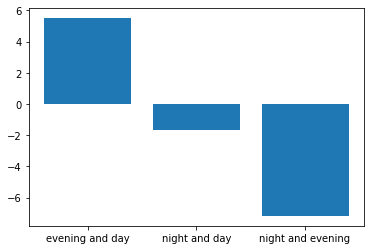

In [56]:
fig, ax = plt.subplots()
plt.bar(x = min_diff_churn["index"], height = min_diff_churn["Difference"])
plt.xticks(ticks=[0,1,2], labels=["evening and day", "night and day", "night and evening"])
plt.show()

In [51]:
avg_min_diff(not_churn, "total day minutes", "total eve minutes", "day time", "evening", "did not churn")
avg_min_diff(not_churn, "total day minutes", "total night minutes", "day time", "night time", "did not churn")
avg_min_diff(not_churn, "total eve minutes", "total night minutes", "evening", "night time", "did not churn")

For customers who did not churn, the average difference in minutes between day time and evening is 23.87 minutes
For customers who did not churn, the average difference in minutes between day time and night time is 24.96 minutes
For customers who did not churn, the average difference in minutes between evening and night time is 1.09 minutes


In [52]:
day_eve_min_diff_not_churn = avg_min_diff2(not_churn, "total day minutes", "total eve minutes")
day_night_min_diff_not_churn = avg_min_diff2(not_churn, "total day minutes", "total night minutes")
eve_night_min_diff_not_churn = avg_min_diff2(not_churn, "total eve minutes", "total night minutes")

In [53]:
min_diff_not_churn = pd.DataFrame([day_eve_min_diff_not_churn, day_night_min_diff_not_churn, eve_night_min_diff_not_churn], 
                              columns = ["Difference"]).reset_index()

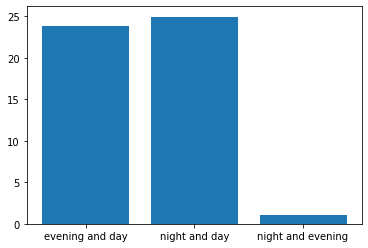

In [55]:
fig, ax = plt.subplots()
plt.bar(x = min_diff_not_churn["index"], height = min_diff_not_churn["Difference"])
plt.xticks(ticks=[0,1,2], labels=["evening and day", "night and day", "night and evening"])
plt.show()

In [43]:
def avg_call_diff(df, col1, col2, period1, period2, churn):
    average_difference = round(df[col1].mean() - df[col2].mean(), 2)
    print(f"""For customers who {churn}, the average difference in calls between {period1} and {period2} is {average_difference} calls""")

In [44]:
avg_call_diff(churn, "total day calls", "total eve calls", "day time", "evening", "churned")
avg_call_diff(churn, "total day calls", "total night calls", "day time", "night time", "churned")
avg_call_diff(churn, "total eve calls", "total night calls", "evening", "night time", "churned")

For customers who churned, the average difference in calls between day time and evening is 0.77 calls
For customers who churned, the average difference in calls between day time and night time is 0.94 calls
For customers who churned, the average difference in calls between evening and night time is 0.16 calls


In [45]:
avg_call_diff(not_churn, "total day calls", "total eve calls", "day time", "evening", "did not churn")
avg_call_diff(not_churn, "total day calls", "total night calls", "day time", "night time", "did not churn")
avg_call_diff(not_churn, "total eve calls", "total night calls", "evening", "night time", "did not churn")

For customers who did not churn, the average difference in calls between day time and evening is 0.24 calls
For customers who did not churn, the average difference in calls between day time and night time is 0.22 calls
For customers who did not churn, the average difference in calls between evening and night time is -0.02 calls


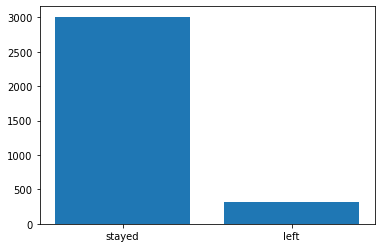

In [60]:
fig, ax = plt.subplots()
plt.bar(x = df["churn"].unique(), height = df["international plan"].value_counts())
plt.xticks(ticks=[0,1], labels=["stayed", "left"])
plt.show()

In [61]:
churn["international plan"].value_counts(normalize=True)

no     0.716356
yes    0.283644
Name: international plan, dtype: float64

In [71]:
churn["total intl calls"].mean()

4.163561076604555

In [75]:
churn["total intl minutes"].mean()

10.699999999999996

In [76]:
churn["total intl charge"].mean()

2.889544513457558

In [62]:
not_churn["international plan"].value_counts(normalize=True)

no     0.934737
yes    0.065263
Name: international plan, dtype: float64

In [72]:
not_churn["total intl calls"].mean()

4.532982456140351

In [74]:
not_churn["total intl minutes"].mean()

10.158877192982445

In [77]:
not_churn["total intl charge"].mean()

2.7434035087719235

In [63]:
intl_plan = df[df["international plan"] == "yes"]
intl_plan

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,8.86,6.6,7,1.78,2,0,558.2,248,65.02,66.80
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,8.41,10.1,3,2.73,3,0,501.9,356,49.36,52.09
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,...,9.18,6.3,6,1.70,0,0,647.9,317,65.91,67.61
7,MO,147,yes,no,0,157.0,79,26.69,103.1,94,...,9.53,7.1,6,1.92,0,0,471.9,269,44.98,46.90
9,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,...,14.69,11.2,5,3.02,0,0,807.0,292,77.52,80.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,IL,71,yes,no,0,186.1,114,31.64,198.6,140,...,9.29,13.8,5,3.73,4,1,591.2,334,57.81,61.54
3309,VT,100,yes,no,0,219.4,112,37.30,225.7,102,...,11.49,12.0,4,3.24,4,0,700.4,309,67.97,71.21
3317,SD,163,yes,no,0,197.2,90,33.52,188.5,113,...,9.50,7.8,8,2.11,1,0,596.8,297,59.04,61.15
3320,GA,122,yes,no,0,140.0,101,23.80,196.4,77,...,5.40,9.7,4,2.62,4,1,456.5,311,45.89,48.51


In [67]:
intl_plan["total intl charge"].mean() / intl_plan["total intl minutes"].mean()

0.27002825599347513

In [64]:
no_intl_plan = df[df["international plan"] == "no"]
no_intl_plan

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,11.01,10.0,3,2.70,1,0,707.2,300,72.86,75.56
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,11.45,13.7,3,3.70,1,0,611.5,329,55.54,59.24
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,7.32,12.2,5,3.29,0,0,527.2,328,59.00,62.29
6,MA,121,no,yes,24,218.2,88,37.09,348.5,108,...,9.57,7.5,7,2.03,3,0,779.3,314,76.28,78.31
8,LA,117,no,no,0,184.5,97,31.37,351.6,80,...,9.71,8.7,4,2.35,1,0,751.9,267,70.97,73.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,no,no,0,134.7,98,22.90,189.7,68,...,9.96,11.8,5,3.19,2,0,545.8,294,48.98,52.17
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,12.56,9.9,6,2.67,2,0,650.8,286,57.43,60.10
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,8.61,9.6,4,2.59,3,0,575.8,235,60.94,63.53
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,8.64,14.1,6,3.81,2,0,661.5,258,63.93,67.74


In [68]:
no_intl_plan["total intl charge"].mean() / no_intl_plan["total intl minutes"].mean()

0.27005246350364914

In [174]:
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percent']
states = states.reset_index()
states

,state,churn,percent
0,AK,0,0.942308
1,AK,1,0.057692
2,AL,0,0.900000
3,AL,1,0.100000
4,AR,0,0.800000
...,...,...,...
97,WI,1,0.089744
98,WV,0,0.905660
99,WV,1,0.094340
100,WY,0,0.883117


In [175]:
states_churn_rate = states.loc[states['churn'] == True].sort_values("percent", ascending =False)\
                                                        .reset_index().drop("index", axis =1)
states_churn_rate

,state,churn,percent
0,NJ,1,0.264706
1,CA,1,0.264706
2,TX,1,0.250000
3,MD,1,0.242857
4,SC,1,0.233333
5,MI,1,0.219178
6,MS,1,0.215385
7,NV,1,0.212121
8,WA,1,0.212121
9,ME,1,0.209677


In [48]:
high_churn = states_churn_rate.loc[states_churn_rate['percent'] >= .2]
high_churn_states = list(high_churn['state'])
high_churn_states

['NJ', 'CA', 'TX', 'MD', 'SC', 'MI', 'MS', 'NV', 'WA', 'ME', 'MT', 'AR']

In [49]:
med_churn = states_churn_rate.loc[(states_churn_rate['percent'] < .2) & (states_churn_rate['percent'] >= .15)]
med_churn_states = list(med_churn['state'])
med_churn_states

['KS', 'NY', 'MN', 'PA', 'MA', 'CT', 'NC', 'NH']

In [50]:
medlow_churn = states_churn_rate.loc[(states_churn_rate['percent'] < .15) & (states_churn_rate['percent'] >= .1)]
medlow_churn_states = list(medlow_churn['state'])
medlow_churn_states

['GA',
 'DE',
 'OK',
 'OR',
 'UT',
 'CO',
 'KY',
 'SD',
 'OH',
 'FL',
 'IN',
 'ID',
 'WY',
 'MO',
 'VT',
 'AL']

In [51]:
low_churn = states_churn_rate.loc[states_churn_rate['percent'] < .1]
low_churn_states = list(low_churn["state"])
low_churn_states

['NM',
 'ND',
 'WV',
 'TN',
 'DC',
 'RI',
 'WI',
 'IL',
 'NE',
 'LA',
 'IA',
 'VA',
 'AZ',
 'AK',
 'HI']

In [52]:
def categorize(state):
    if state in high_churn_states:
        state = "high"
    elif state in med_churn_states:
        state = "med"
    elif state in medlow_churn_states:
        state = "med-low"
    else:
        state ="low"
    return state

def competition(df):
    df["churn_rate"] = df["state"].apply(categorize)
    return df

In [54]:
competition(df)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,0,707.2,300,72.86,75.56,med
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,0,611.5,329,55.54,59.24,med-low
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,0,527.2,328,59.00,62.29,high
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,0,558.2,248,65.02,66.80,med-low
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,0,501.9,356,49.36,52.09,med-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,0,650.8,286,57.43,60.10,low
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,0,575.8,235,60.94,63.53,low
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,0,661.5,258,63.93,67.74,low
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,5.0,10,1.35,2,0,512.6,326,56.18,57.53,med


In [177]:
high_churn = states_churn_rate.loc[states_churn_rate['percent'] >= .2]
high_churn_states = pd.DataFrame(high_churn[['state', "percent"]])
high_churn_states

,state,percent
0,NJ,0.264706
1,CA,0.264706
2,TX,0.250000
3,MD,0.242857
4,SC,0.233333
5,MI,0.219178
6,MS,0.215385
7,NV,0.212121
8,WA,0.212121
9,ME,0.209677


In [179]:
high_churn_states["percent"] = round(high_churn_states["percent"]*100, 2)
high_churn_states

,state,percent
0,NJ,26.47
1,CA,26.47
2,TX,25.00
3,MD,24.29
4,SC,23.33
5,MI,21.92
6,MS,21.54
7,NV,21.21
8,WA,21.21
9,ME,20.97


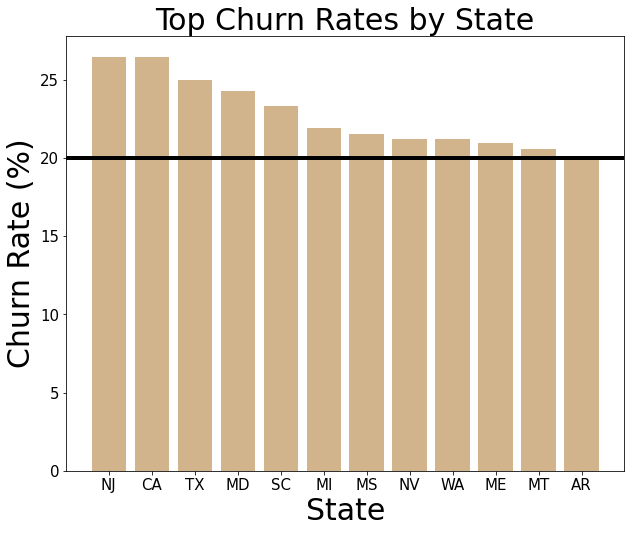

In [185]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x = high_churn_states["state"], height = high_churn_states["percent"], color = "tan")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("State", fontsize = 30)
ax.set_ylabel("Churn Rate (%)", fontsize = 30)
ax.set_title("Top Churn Rates by State",fontsize = 30)
plt.axhline(y=20, linewidth=4, color='black')
plt.show()

In [55]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_domestic_minutes,total_domestic_calls,total_domestic_charge,total_charge,churn_rate
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,...,10.0,3,2.70,1,0,707.2,300,72.86,75.56,med
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,...,13.7,3,3.70,1,0,611.5,329,55.54,59.24,med-low
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,...,12.2,5,3.29,0,0,527.2,328,59.00,62.29,high
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,...,6.6,7,1.78,2,0,558.2,248,65.02,66.80,med-low
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,...,10.1,3,2.73,3,0,501.9,356,49.36,52.09,med-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,...,9.9,6,2.67,2,0,650.8,286,57.43,60.10,low
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,...,9.6,4,2.59,3,0,575.8,235,60.94,63.53,low
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,...,14.1,6,3.81,2,0,661.5,258,63.93,67.74,low
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,...,5.0,10,1.35,2,0,512.6,326,56.18,57.53,med


In [56]:
df.to_pickle("../../data/model.pkl")

## modeling

In [363]:
df["churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

The model would only be right 14.5% of the time if the model only guessed every customer would leave. 

As we devlop our models, we will be optomizing the recall score of our models. Our strategies  We may identify more people as leaving, but in reality they stay. The company will spend some resources to retain the customer. However, that the cost of keeping them engaged with the company far outweighs the cost of identifying someone as staying and in actuality they leave the company. The company would lose a customer and then have to spend more resources to get a new customer in their place. 

In [718]:
X = df.drop("churn", axis = 1)
y = df["churn"]
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=seed)
X_train.shape, X_test.shape

((2999, 19), (334, 19))

In [639]:
X_train_cat = X_train[["state"]]
X_test_cat = X_test[["state"]]

ohe = OneHotEncoder(categories="auto", sparse=False)
state_ohe_train = ohe.fit_transform(X_train_cat)
state_ohe_test = ohe.transform(X_test_cat)

X_train_cat = pd.DataFrame(state_ohe_train, columns=ohe.categories_[0],index= X_train.index)
X_test_cat = pd.DataFrame(state_ohe_test, columns=ohe.categories_[0],index= X_test.index)

X_train = pd.concat([X_train, X_train_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)

X_train = X_train.drop("state", axis = 1)
X_test = X_test.drop("state", axis = 1)

In [643]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

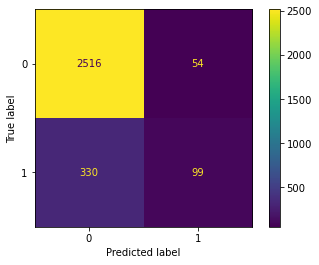

In [644]:
logreg = LogisticRegression(random_state=seed, max_iter = 1e4)

model = logreg.fit(X_train_scaled, y_train)
plot_confusion_matrix(model, X_train_scaled, y_train)

In [653]:
cv = cross_validate(model, X_train_scaled, y_train, scoring=["accuracy", "recall"])

print(f"Average Accuracy: {cv['test_accuracy'].mean()} +/- {cv['test_accuracy'].std()}")
print(f"Average Recall: {cv['test_recall'].mean()} +/- {cv['test_recall'].std()}")

Average Accuracy: 0.8629538119087368 +/- 0.010409319085544877
Average Recall: 0.20049247606019152 +/- 0.037920064427068086


In [719]:
X2 = df.drop("churn", axis = 1)
y2 = df["churn"]
seed = 42

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.10, random_state=seed)

In [720]:
num_cols = []
cat_cols = []

for c in X2.columns:
    if X2[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    else:
        cat_cols.append(c)

In [721]:
print(num_cols)
print(cat_cols)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
['state', 'international plan', 'voice mail plan', 'churn_rate']


In [722]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

cat_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [723]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [724]:
X_train_transformed = preprocessor.fit_transform(X_train2)
X_train_transformed.shape

(2999, 74)

In [725]:
pd.DataFrame(X_train_transformed)

,0
0,"(0, 0)\t0.23966942148760334\n (0, 1)\t0.549..."
1,"(0, 0)\t0.3223140495867769\n (0, 2)\t0.5071..."
2,"(0, 0)\t0.5578512396694215\n (0, 2)\t0.7132..."
3,"(0, 0)\t0.5743801652892563\n (0, 2)\t0.4575..."
4,"(0, 0)\t0.5454545454545455\n (0, 2)\t0.3628..."
...,...
2994,"(0, 0)\t0.43388429752066116\n (0, 2)\t0.782..."
2995,"(0, 0)\t0.5\n (0, 2)\t0.10005701254275941\n..."
2996,"(0, 0)\t0.26859504132231404\n (0, 2)\t0.249..."
2997,"(0, 0)\t0.6942148760330579\n (0, 2)\t0.5108..."


In [726]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['account length', 'number vmail messages',
                                  'total day minutes', 'total day calls',
                                  'total day charge', 'total eve minutes',
                                  'total eve calls', 'total eve charge',
                                  'total night minutes', 'total night calls',
                                  'total night charge', 'total intl minutes',
                                  'total intl calls', 'total intl charge',
                                  'customer service calls']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['state', 'international plan',
                                  

In [727]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=seed))
])

In [728]:
cv2 = cross_validate(clf, X_train2, y_train2, scoring=["accuracy", "recall"])

print(f"Average Accuracy: {cv2['test_accuracy'].mean()} +/- {cv2['test_accuracy'].std()}")
print(f"Average Recall: {cv2['test_recall'].mean()} +/- {cv2['test_recall'].std()}")

Average Accuracy: 0.8632882582081246 +/- 0.0101034696452511
Average Recall: 0.20746922024623798 +/- 0.03244189435477054
